In [1]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
import time
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
#import data
data = pd.read_csv('cleaned data.csv')
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Marital,Spent,Family_Size
0,-0.891943,0.314569,-0.823719,-0.931161,0.311683,0.974178,1.548116,1.747883,2.448550,1.479812,...,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,2.370363,-1.973635,0.400582,1.678816,-1.760647
1,-0.891943,-0.254830,1.038308,0.906152,-0.380005,-0.874842,-0.638885,-0.731930,-0.652580,-0.635617,...,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,1.664635,0.400582,-0.964140,0.447928
2,-0.891943,0.965125,-0.823719,-0.931161,-0.795017,0.354875,0.567737,-0.176268,1.335792,-0.149312,...,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,0.172342,1.383749,0.280875,-0.656360
3,-0.891943,-1.205824,1.038308,-0.931161,-0.795017,-0.874842,-0.563471,-0.667638,-0.506644,-0.586987,...,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,1.922668,1.383749,-0.920922,0.447928
4,0.571826,0.322052,1.038308,-0.931161,1.556721,-0.394808,0.416909,-0.217598,0.150066,-0.003420,...,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,0.821726,-0.582584,-0.307557,0.447928


In [3]:
#create label and training data
y = [1 if i>0 else 0 for i in data['Complain']]
data = data.drop(['Complain'],axis=1)
print('The shape of training dataset',data.shape)

The shape of training dataset (2204, 26)


In [4]:
#Samples distribution
postive = sum(y)
negative = len(y)-postive
print("There are "+str(postive)+" postive samples and "+str(negative)+" negative samples")
print("This is a skewed dataset")

There are 20 postive samples and 2184 negative samples
This is a skewed dataset


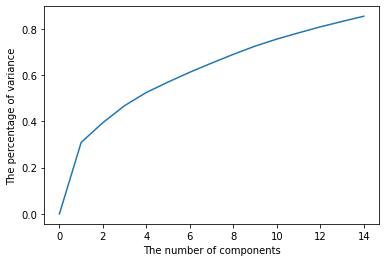

In [5]:
#compute the best parameter
variance=[]
for i in range(15): 
    pca = PCA(n_components=i)
    pca.fit_transform(data)
    R_value = pca.explained_variance_ratio_
    variance.append(sum(R_value))
plt.xlabel('The number of components')
plt.ylabel('The percentage of variance')
plt.plot(range(15),variance)
plt.show()

In [6]:
pca = PCA(n_components=8)
x = pca.fit_transform(data)
variance = sum(pca.explained_variance_ratio_)*100
print('The number of dimension has been reduced from 26 to 8. The reduced dataset explains for '+str(variance)+' percent information of the initial dataset')

The number of dimension has been reduced from 26 to 8. The reduced dataset explains for 68.9679687959174 percent information of the initial dataset


# RandomUnderSampling


In [7]:
rus = RandomUnderSampler(random_state=42)
x_undsam, y_undsam = rus.fit_resample(x, y)

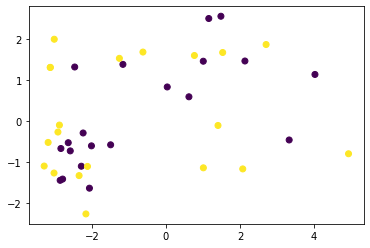

In [8]:
plt.scatter(x_undsam[:,0:1],x_undsam[:,1:2],c=y_undsam)
plt.show()

# RandomOverSampling

In [9]:
# ros = RandomOverSampler(random_state=42)
# x_res, y_res = ros.fit_resample(x, y)

In [20]:
# oversam_data = pd.DataFrame(data=x_res, columns=['col1','col2','col3','col4','col5','col6','col7','col8'])
# oversam_data['Complaint'] = y_res
# oversam_data.to_csv('oversampling_data')

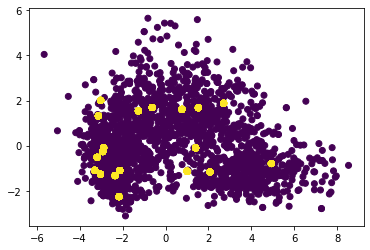

The dataset after over sampling is not linear separable


In [10]:
plt.scatter(x_res[:,0:1],x_res[:,1:2],c=y_res)
plt.show()
print('The dataset after over sampling is not linear separable')

In [11]:
#split the whole dataset into training set and test set
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,shuffle=True)

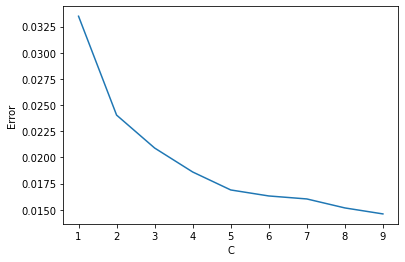

In [12]:
#Support vector machine
#Because the dataset is not linear separable, I used the 'rbf' kernel in the SVM
#cross validation to determine the hyperparameter
accuracy = []
for i in range(1,10):
    svm = SVC(C=i,kernel='rbf',gamma='auto')
    score = cross_val_score(svm,x_train,y_train,scoring='accuracy',cv=5)
    accuracy.append(1-score.mean())
plt.ylabel('Error')
plt.xlabel("C")
plt.plot(range(1,10),accuracy)
    

In [13]:
#The error goes down as Regularization parameter increase
svm = SVC(C=9, kernel='rbf',gamma='auto')
svm.fit(x_train,y_train)

predict = svm.predict(x_test)

print('accuracy = ',svm.score(x_test,y_test))
print('f1_score = ',f1_score(y_test,predict,average='micro'))
print('confusion_matrix = '+'\n', confusion_matrix(y_test,predict))


accuracy =  0.9931350114416476
f1_score =  0.9931350114416476
confusion_matrix = 
 [[419   6]
 [  0 449]]


In [14]:
predict = svm.predict(x)

print('accuracy = ',svm.score(x,y))
print('f1_score = ',f1_score(y,predict,average='micro'))
print('confusion_matrix = '+'\n', confusion_matrix(y,predict,labels=[1,0]))

accuracy =  0.9891107078039928
f1_score =  0.9891107078039928
confusion_matrix = 
 [[  20    0]
 [  24 2160]]


In [15]:
#logistic regression
clf = LogisticRegression().fit(x_train, y_train)
predict = clf.predict(x_test)
print('accuracy = ',clf.score(x_test,y_test))
print('f1_score = ',f1_score(y_test,predict,average='micro'))
print('confusion_matrix = '+'\n', confusion_matrix(y_test,predict))

accuracy =  0.6716247139588101
f1_score =  0.6716247139588101
confusion_matrix = 
 [[253 172]
 [115 334]]
